In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('../../../data/concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Strength'),
                                                    df.iloc[:,-1],
                                                    test_size=0.2,
                                                    random_state=42)

In [11]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314848

In [12]:
# cross val
np.mean(cross_val_score(lr,df.drop(columns='Strength'),df.iloc[:,-1],scoring='r2'))

np.float64(0.4609940491662864)

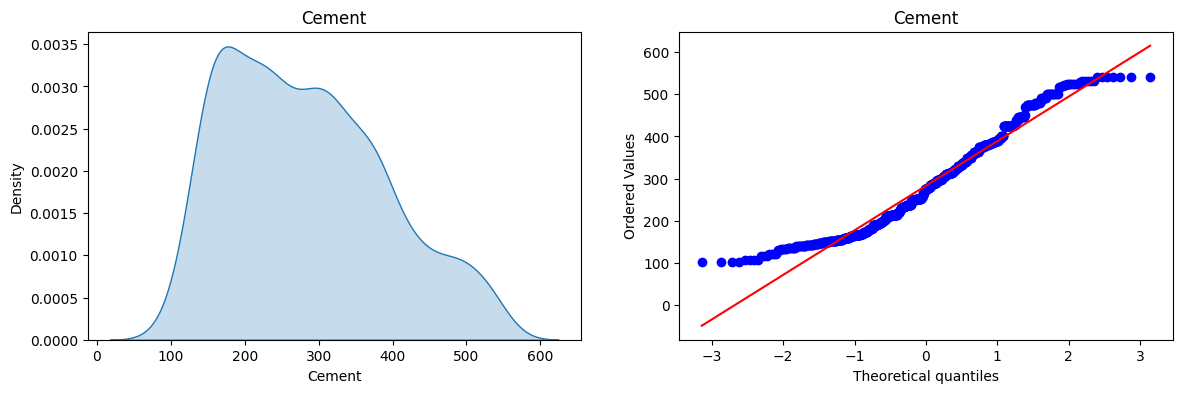

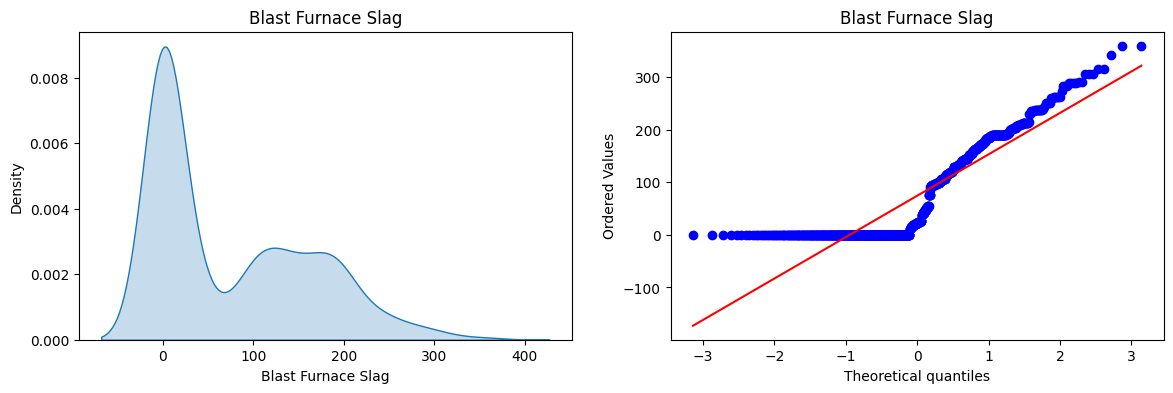

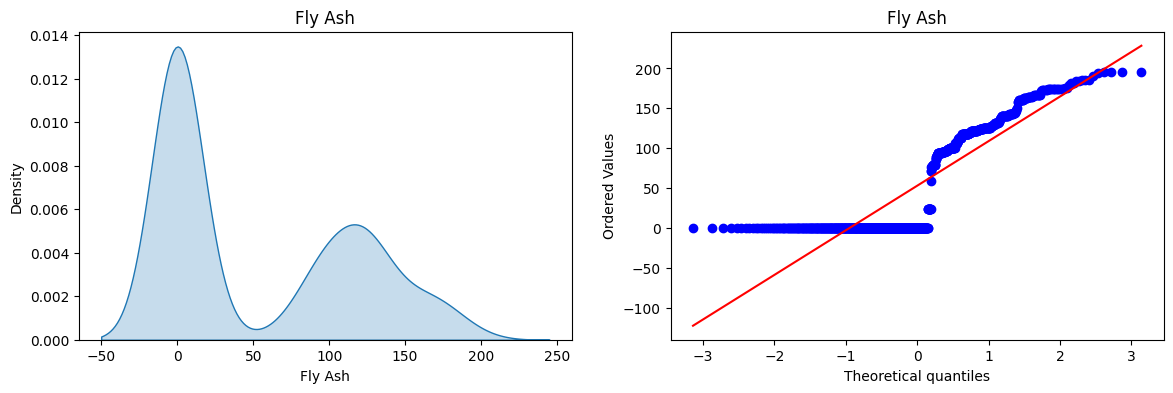

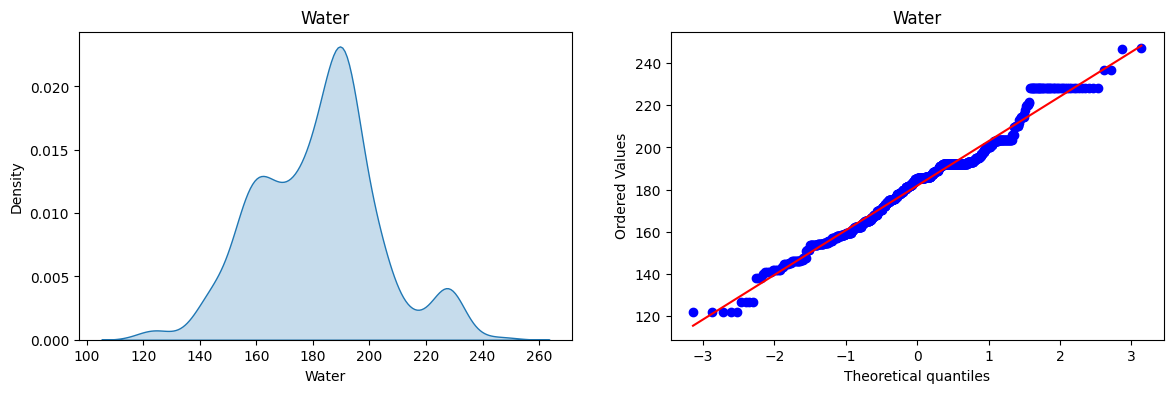

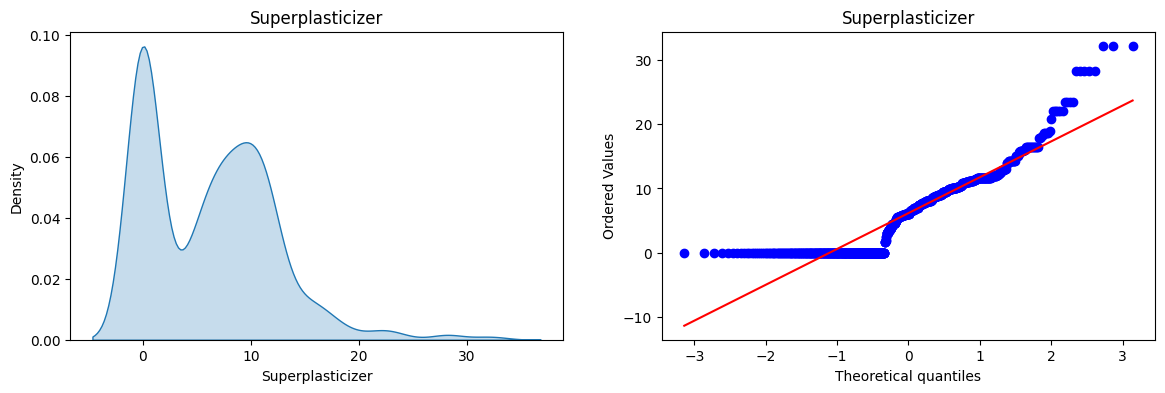

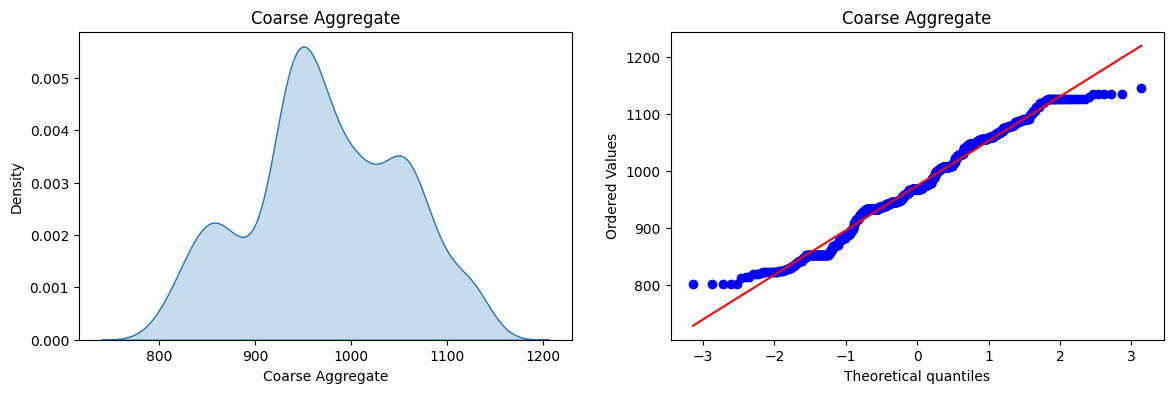

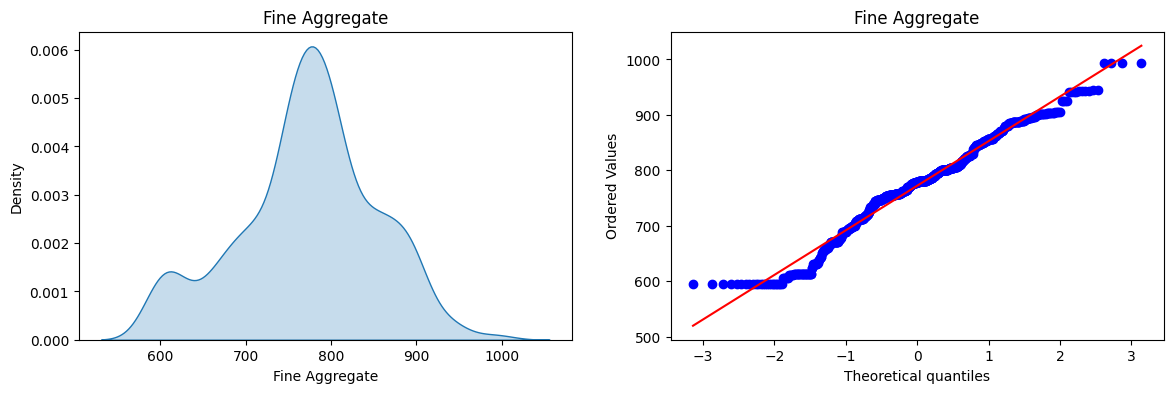

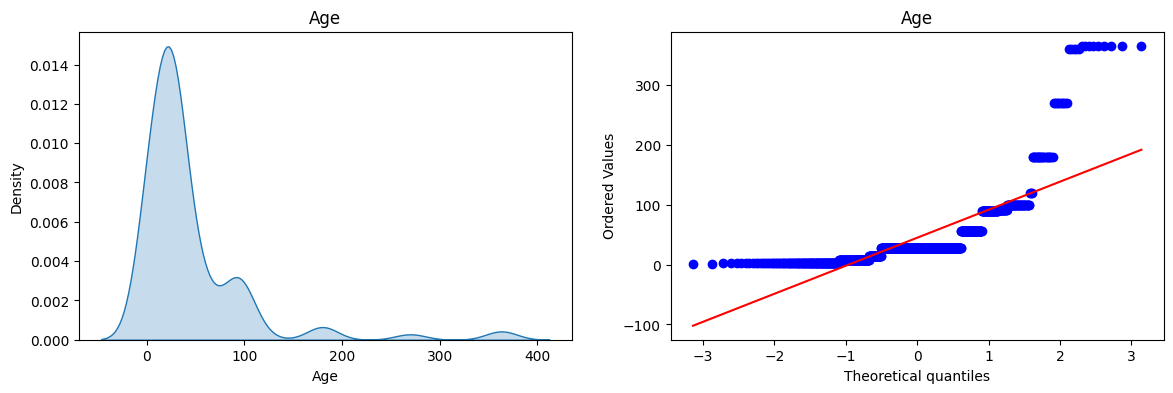

In [13]:
#plotting the displots without any transformation
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col], fill=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)

    plt.show()


# Applying Power Transformer

In [14]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)# --> added very small value so that denominator is not zero
X_test_transformed = pt.fit_transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [15]:
lr = LinearRegression()

lr.fit(X_train_transformed,y_train)

y_pred = lr.predict(X_test_transformed)

r2_score(y_test,y_pred)

0.8055321002541034

In [18]:
# cross val
X_transformed = pt.fit_transform(df.drop(columns='Strength')+0.000001)
np.mean(cross_val_score(lr,X_transformed,df.iloc[:,-1],scoring='r2'))

np.float64(0.6662950327179041)

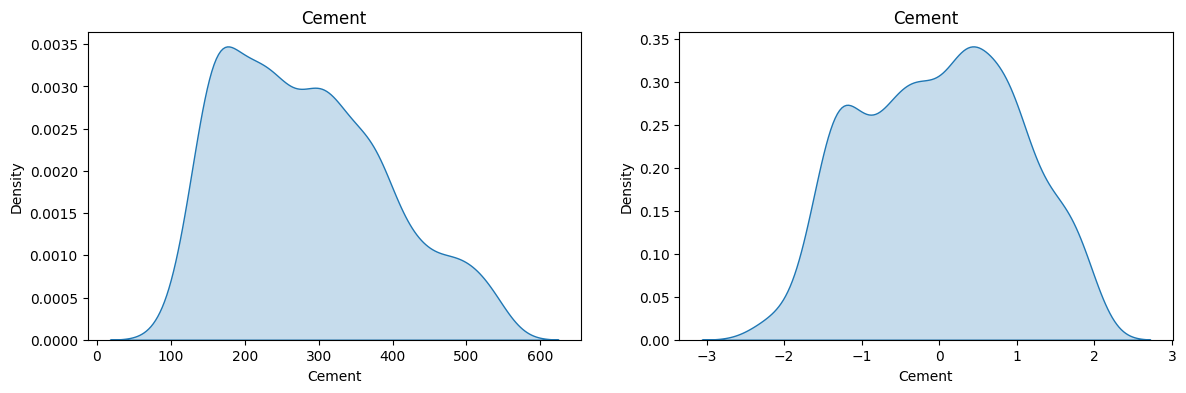

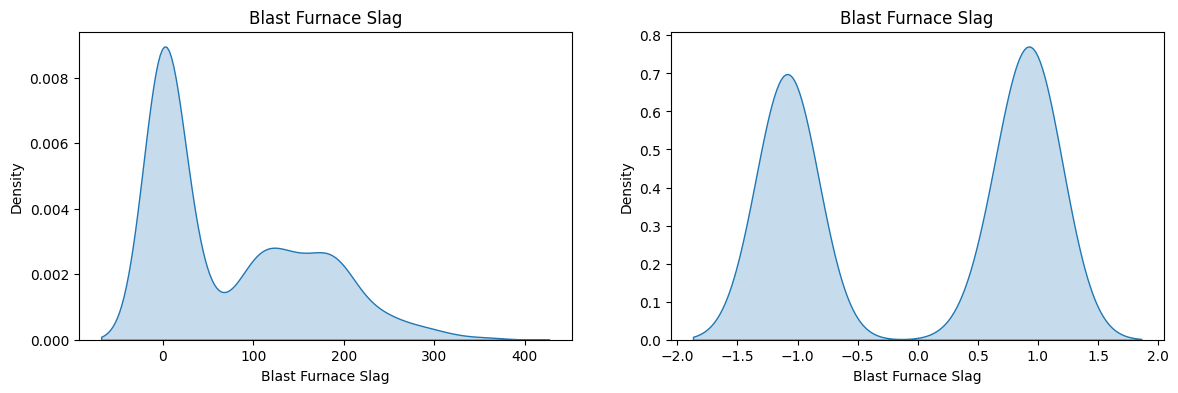

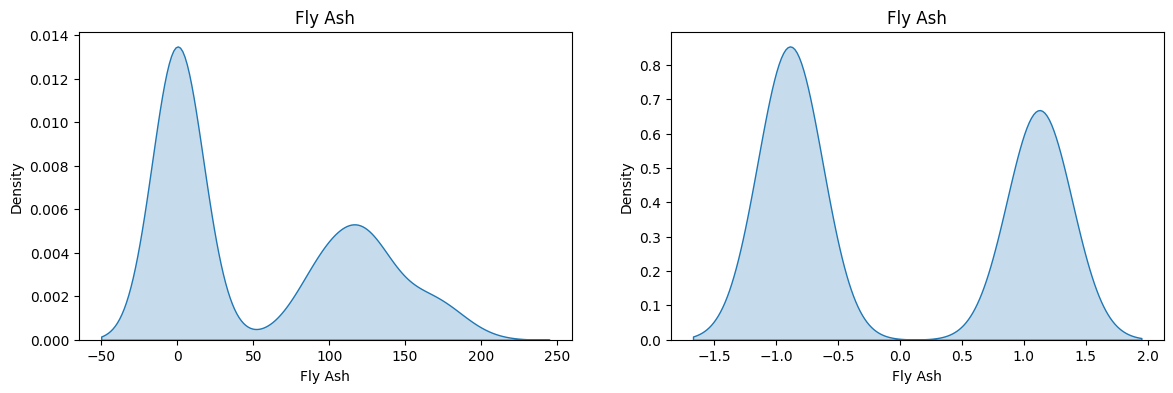

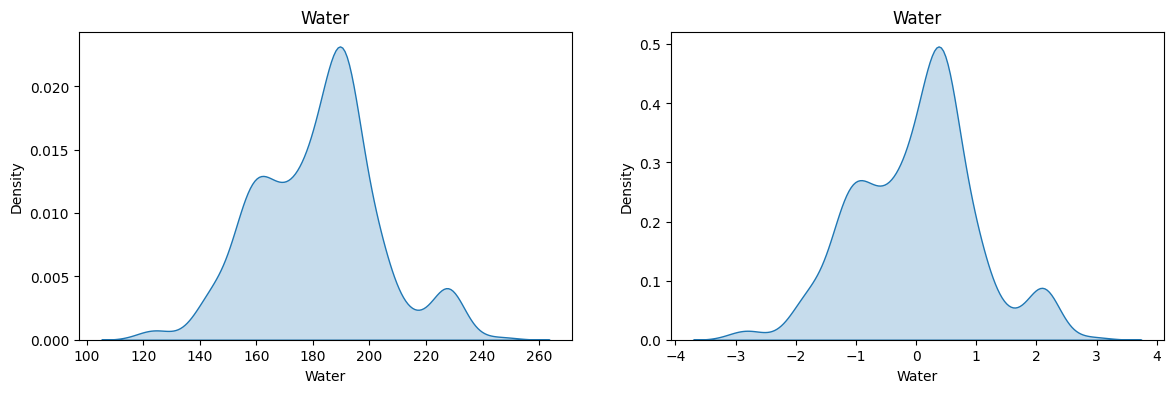

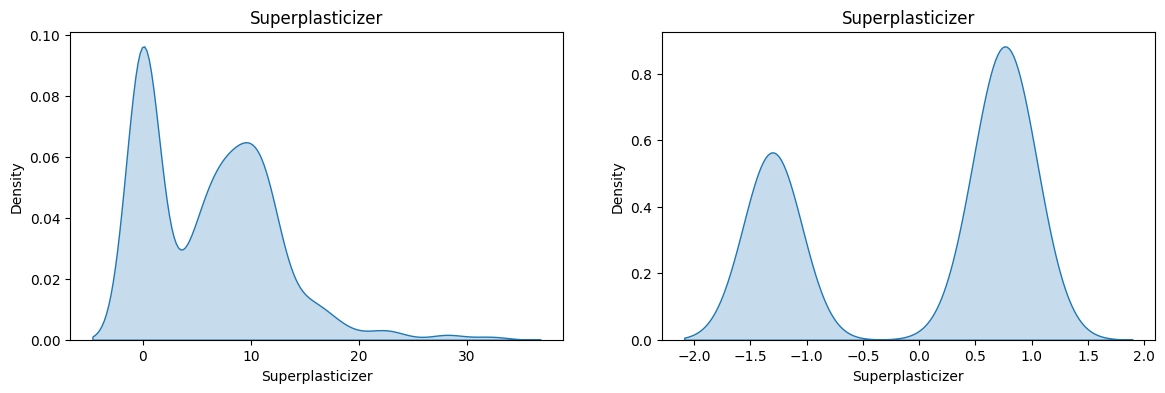

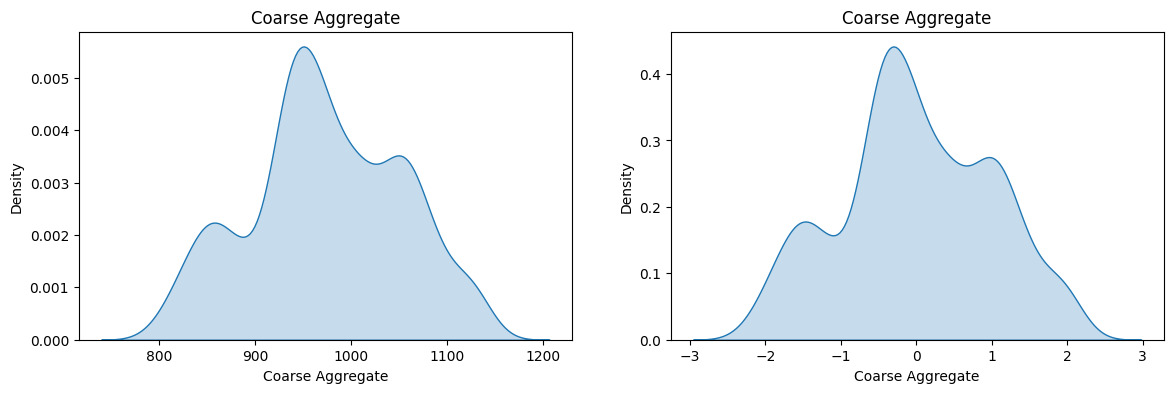

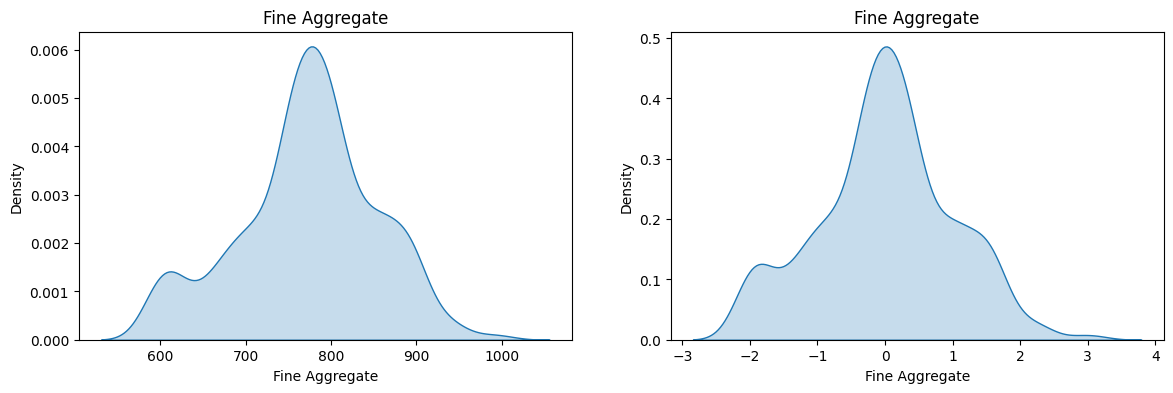

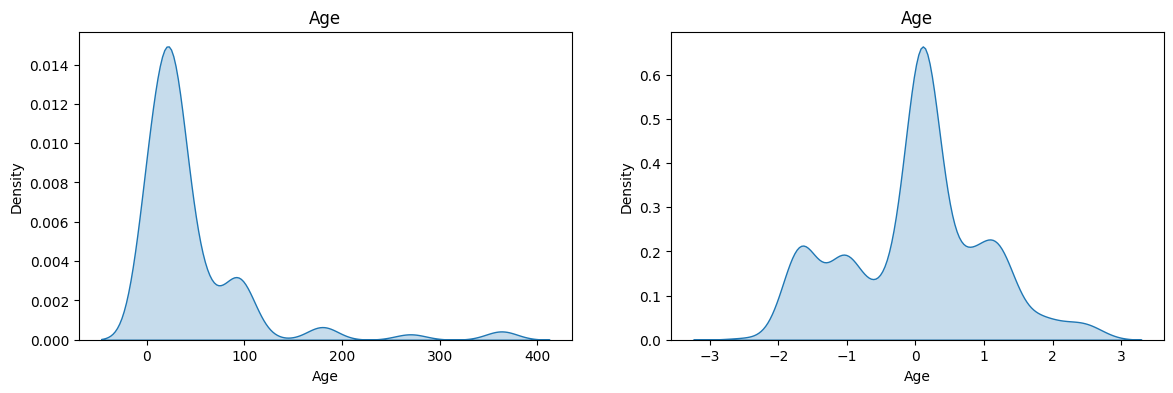

In [ ]:
#plotting the displots after applying log transformation

X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col], fill=True)
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col], fill=True)
    plt.title(col)

    plt.show()

# Applying Yeo-Johnson transform

In [27]:
pt1 = PowerTransformer() # --> default is yeo-johnson

X_train_transformed_1 = pt1.fit_transform(X_train)
X_test_transformed_1 = pt1.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed_1,y_train)

y_pred_2 = lr.predict(X_test_transformed_1)

print(r2_score(y_test, y_pred_2))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})


0.8153845514645103


,cols,Yeo_Johnson_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [28]:
# cross val
X_transformed = pt1.fit_transform(df.drop(columns='Strength'))
np.mean(cross_val_score(lr,X_transformed,df.iloc[:,-1],scoring='r2'))

np.float64(0.6834625126992433)

In [29]:
X_train_transformed_2 =pd.DataFrame(X_train_transformed_1,columns=X_train.columns)

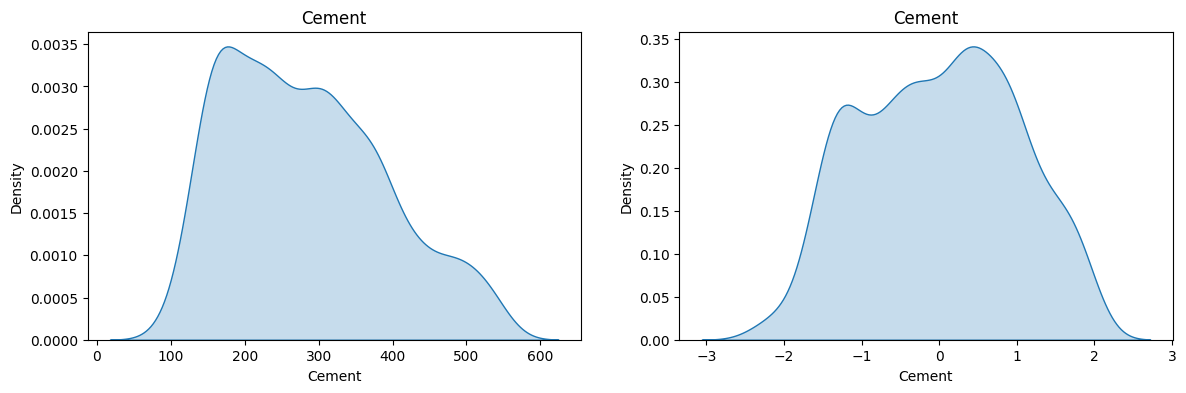

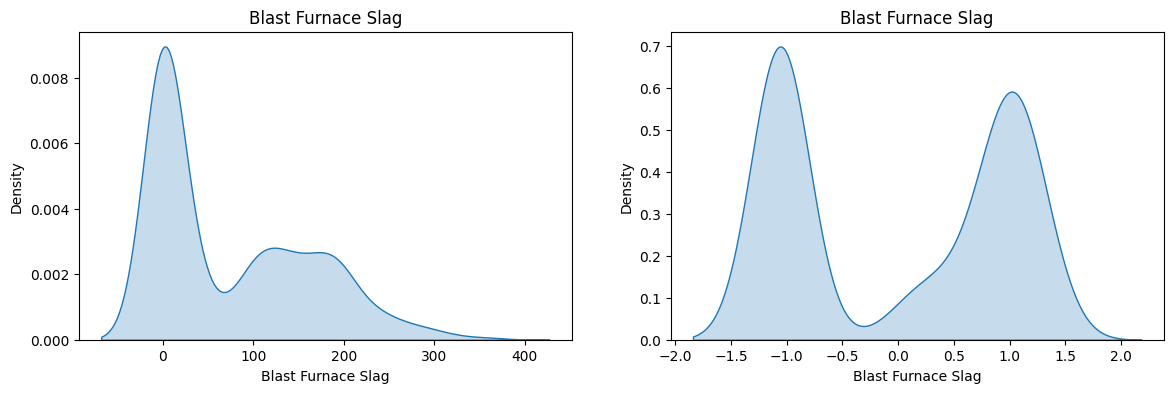

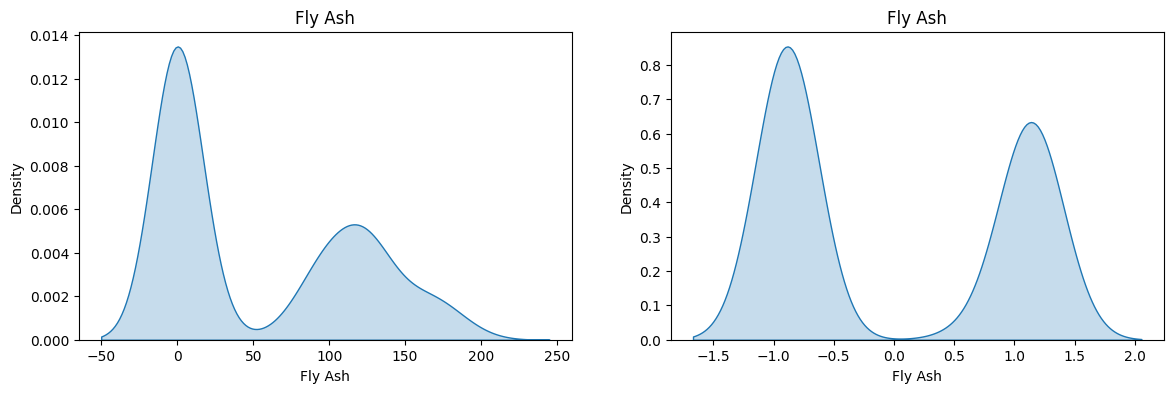

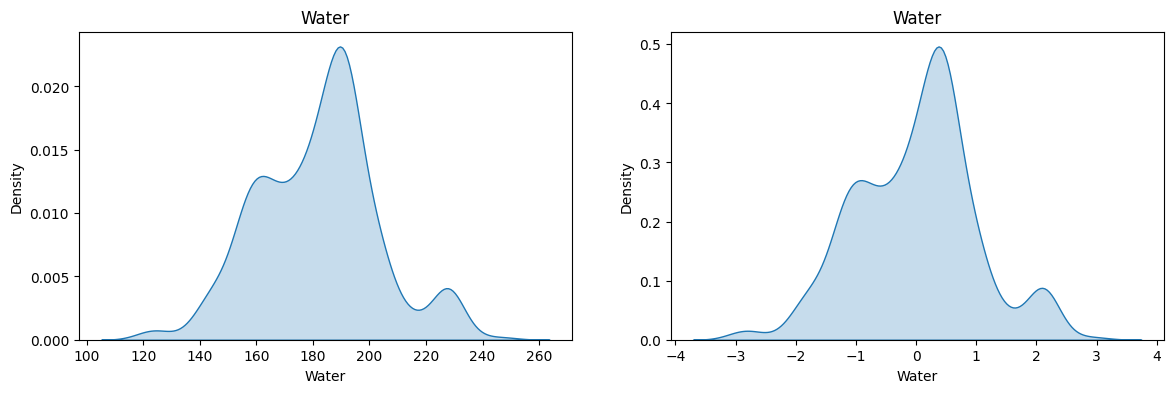

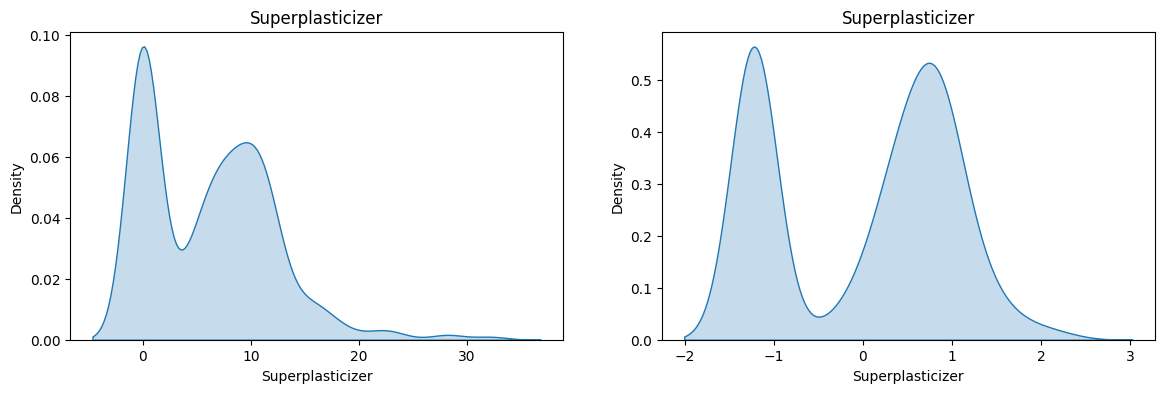

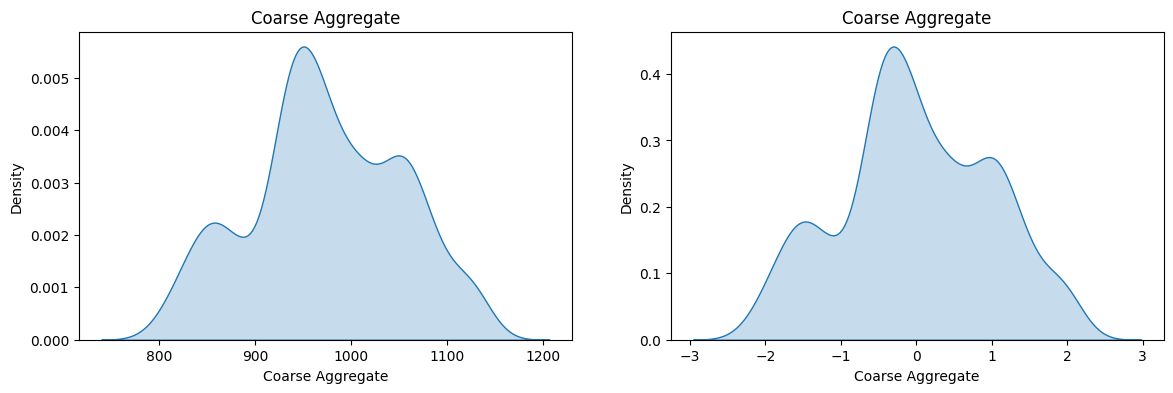

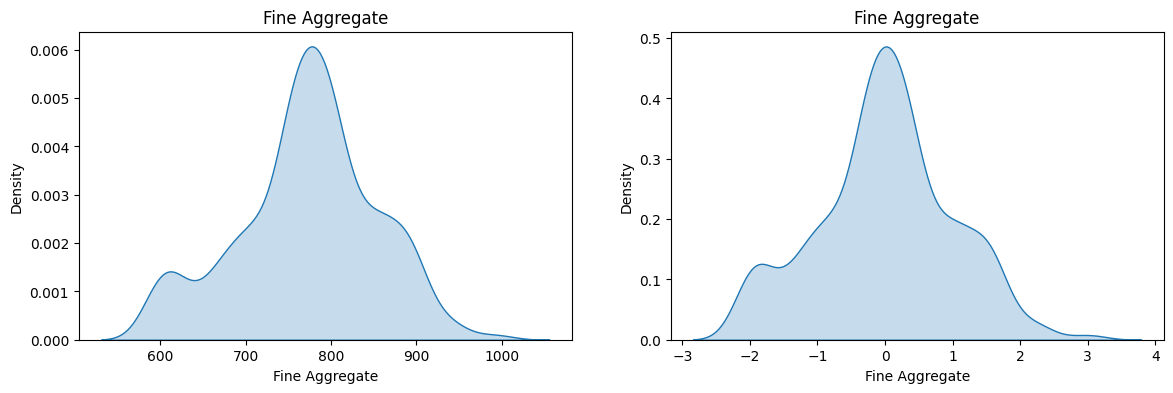

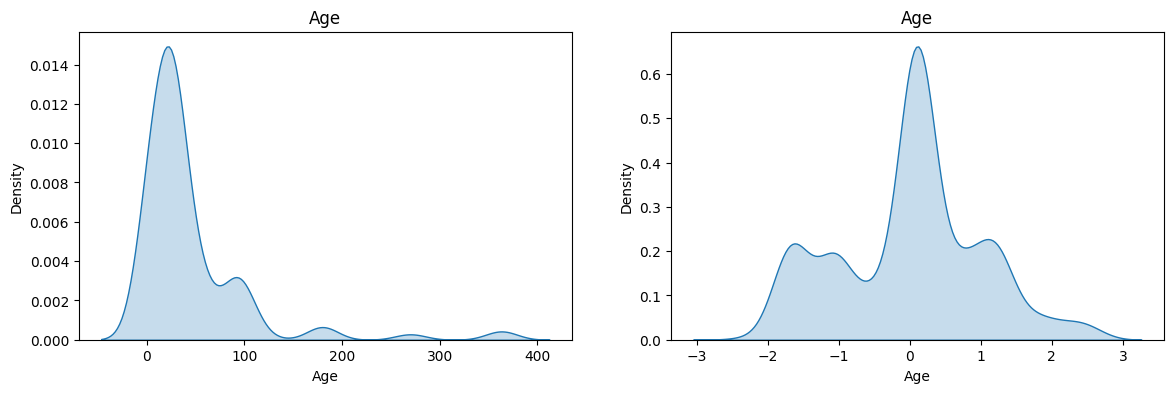

In [30]:
#plotting the displots after applying yeo-johnson transformation

X_train_transformed_1 = pd.DataFrame(X_train_transformed_1,columns=X_train.columns)

for col in X_train_transformed_1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col], fill=True)
    plt.title(col)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed_1[col], fill=True)
    plt.title(col)

    plt.show()